# Preliminary Analysis
## for KidKit

## Data Wrangling

> The original dataset reports domestic flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

> Data is available at the http://stat-computing.org/dataexpo/2009/the-data.html originally from https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp described in detail here https://www.transtats.bts.gov/Fields.asp?Table_ID=236

In [1]:
# import modules
import pandas as pd
import numpy as np
import calendar
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#read entire datasets, three of them - one for every dacade
df_88 = pd.read_csv('1988.csv', nrows=None, encoding='latin-1')
df_98 = pd.read_csv('1998.csv', nrows=None, encoding='latin-1')
df_08 = pd.read_csv('2008.csv', nrows=None, encoding='latin-1')
df_88.shape, df_98.shape, df_08.shape 

((5202096, 29), (5384721, 29), (7009728, 29))

### What is the structure of our dataset?

> We have selected three datasets to show how delays have evolved last thirty years in the aviation industry and perhaps get some insights about how to handle critical aviation operations linked to higher volume of flights This is because the first two datasets representing 5 million records each, demonstrate there has not been a significant change in flights volume. In the 2008 dataset a significant increase in the dataset records raise questions how this 30% increase has been handled by the actual aviation system and is so, there has been a direct impact in the passenger experience with respect to flight delays.

### What are the main feature of interest in our dataset?

> As explained before an increase in flight demand, must have altered aviation system's supply operations. Out of the 27 features - columns of our dataset We will focus on the delayed fligts or delays in general. However further investigation has to be performed with respect to cancelled flights, taxi  and local trasportation as well as including operations to final destinations. Other interesting information is provided and can be further eplored to improve passenger experience and further explore the success of innovative business models in the aviation industry. This can provide inderesting insights from the operations management prespective as well a comprehensive understanding of the operational cost for being idle. Carrier delay data can be thus analyzed, something we are not providing here.

### What features in the dataset that will help support our investigation into our features of interest?

> For the sake of this analyses we will be analysing 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'and 'LateAircraftDelay'. 'ArrDelay' which is the delay of flights arrival in the case this is true is the sum in minutes of the following variables 'CarrierDelay' 'WeatherDelay', 'NASDelay', 'SecurityDelay' and 'LateAircraftDelay' aka, Carrier Delay, Weather Delay, National Airline System Delay, Security Delay and Late Aircraft Delay.

### Update Dataset

> We are now focussing on the part of the delayed flights so we have to drop from our dataset null values assuming empty records for delayed flights are the flights that arrive on time. Additionally, we only keep columns we are interested in, thus 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'and 'LateAircraftDelay'

In [3]:
#Let's have a look at our field names
df_98.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

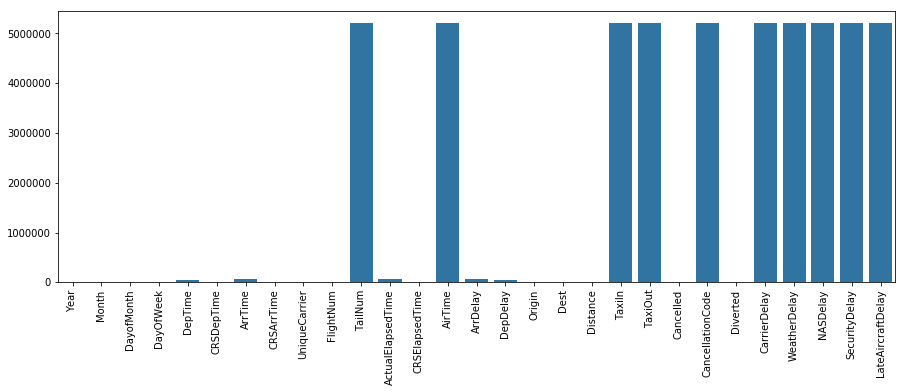

In [4]:
#Let's visualize nulls in 1988 dataset in a seaborn barplot
plt.figure(figsize = (15,5))
na_counts = df_88.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color=base_color)
locs, labels = plt.xticks() 
plt.xticks(np.arange(len(df_88.columns)), df_88.columns, rotation=90);

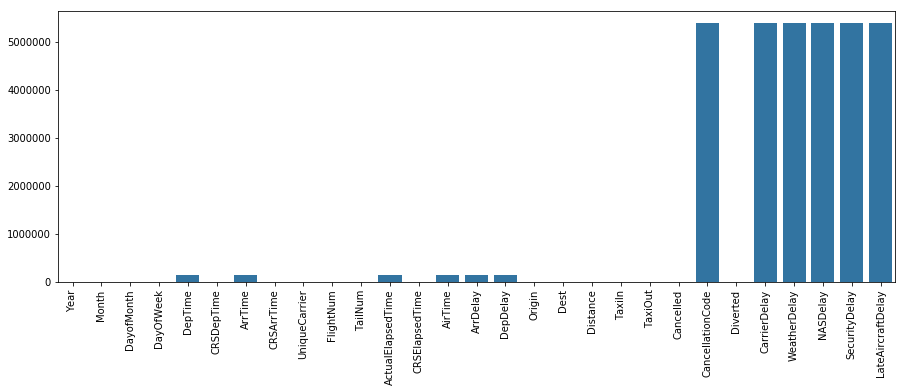

In [5]:
#Let's visualize nulls in 1998 dataset in a seaborn barplot
plt.figure(figsize = (15,5))
na_counts = df_98.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color=base_color)
locs, labels = plt.xticks() 
plt.xticks(np.arange(len(df_98.columns)), df_98.columns, rotation=90);

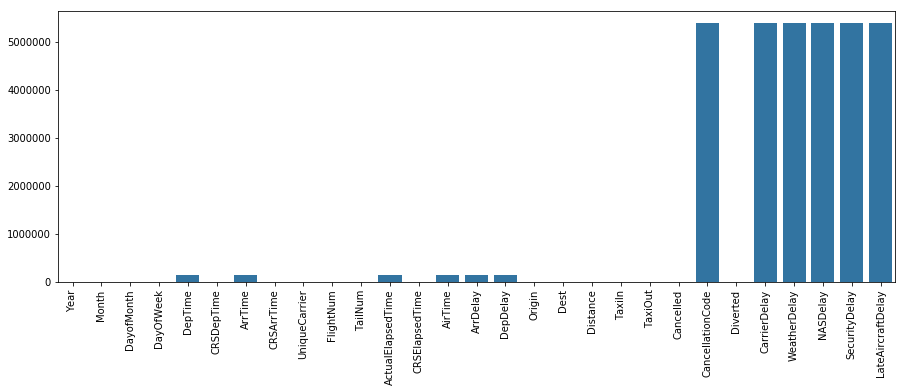

In [6]:
#Let's visualize nulls in 2008 dataset in a seaborn barplot
plt.figure(figsize = (15,5))
na_counts = df_98.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color=base_color)
locs, labels = plt.xticks() 
plt.xticks(np.arange(len(df_98.columns)), df_98.columns, rotation=90);

In [7]:
#Check the ammount of ArrDelay in all three datasets
df_88.ArrDelay.sum(), df_98.ArrDelay.sum(), df_08.ArrDelay.sum()

(33636991.0, 39657467.0, 55994978.0)

In [8]:
#Check mean ArrDelay in all three datasets
df_88.ArrDelay.mean(), df_98.ArrDelay.mean(), df_08.ArrDelay.mean()

(6.547350003318737, 7.586967680246472, 8.16845238729114)

## Variables NAN exploration and data comprehension 

> 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'and 'LateAircraftDelay' are the columns we are mostly interested in. We have a great deal of information however it seems we started collecting more dettailed data about 'ArrDelay' after 1998. The reason we started collecting this kind of data could be the increased volume of flights, complexity of operations or even simly we tried to further explore our aviation systems. We also started collecting TaxiIn and TaxiOut information sometime after 1988 and before 1998. It is interesting to further explore why Air time is stored two times!

In [9]:
#colums to keep
fields = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay' ]

In [10]:
#columns to drop 
#In this particular phase we are so lucky all our column names are the same in all datasets
fields_to_drop = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 
                  'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Origin', 'Dest', 'Distance', 
                  'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted']
df_88.drop(fields_to_drop,axis=1,inplace=True)
df_98.drop(fields_to_drop,axis=1,inplace=True)
df_08.drop(fields_to_drop,axis=1,inplace=True)

In [11]:
#check datatypes for 1988 dataset
df_88.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202096 entries, 0 to 5202095
Data columns (total 10 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
ArrDelay             float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(6), int64(4)
memory usage: 396.9 MB


In [12]:
#check datatypes for 1998 dataset
df_98.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384721 entries, 0 to 5384720
Data columns (total 10 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
ArrDelay             float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(6), int64(4)
memory usage: 410.8 MB


In [13]:
#check datatypes for 2008 dataset
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 10 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
ArrDelay             float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(6), int64(4)
memory usage: 534.8 MB


## Fix Datetime for better data manipulation

> 'Year', 'Month', 'DayofMonth', 'DayOfWeek', provide insightful information so parsing this as datetime can make our life easier in terms of data manipulation

In [14]:
#Transform ints to Month names in all datasets for "Month" column using calendar.month_name method
df_88['Month'] = df_88['Month'].apply(lambda x: calendar.month_name[x])
df_98['Month'] = df_98['Month'].apply(lambda x: calendar.month_name[x])
df_08['Month'] = df_08['Month'].apply(lambda x: calendar.month_name[x])

In [15]:
#Transform ints to Month names in all datasets for "DayOfWeek" column using calendar.month_name method
df_88.DayOfWeek = df_88.DayOfWeek.apply(lambda x: calendar.day_name[x-1])
df_98.DayOfWeek = df_98.DayOfWeek.apply(lambda x: calendar.day_name[x-1])
df_08.DayOfWeek = df_08.DayOfWeek.apply(lambda x: calendar.day_name[x-1])

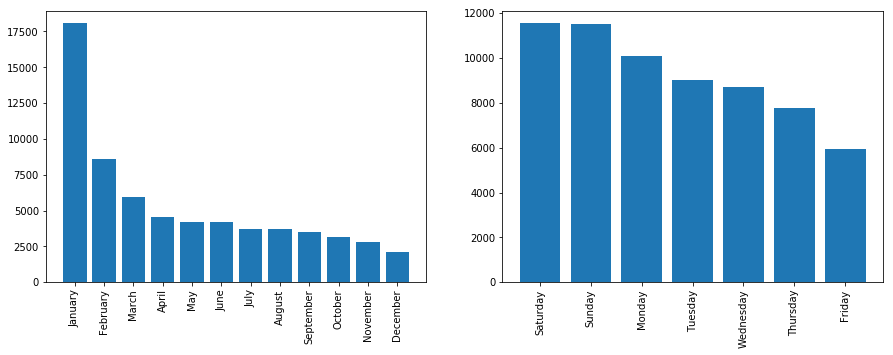

In [16]:
#Get some visual insights about NANs in the 'ArrDelay' feature for 1988 dataset
plt.figure(figsize = [15,5])

plt.subplot(1, 2, 1)
plt.bar(df_88[df_88.ArrDelay.isna() == True].Month.unique(), df_88[df_88.ArrDelay.isna() == True].Month.value_counts());
locs, labels = plt.xticks() 
plt.xticks(np.arange(12), df_88.Month.unique(), rotation=90);

plt.subplot(1, 2, 2)
plt.bar(df_88[df_88.ArrDelay.isna() == True].DayOfWeek.unique(), df_88[df_88.ArrDelay.isna() == True].DayOfWeek.value_counts());
locs, labels = plt.xticks() 
plt.xticks(np.arange(7), df_88.DayOfWeek.unique(), rotation=90);

plt.show()

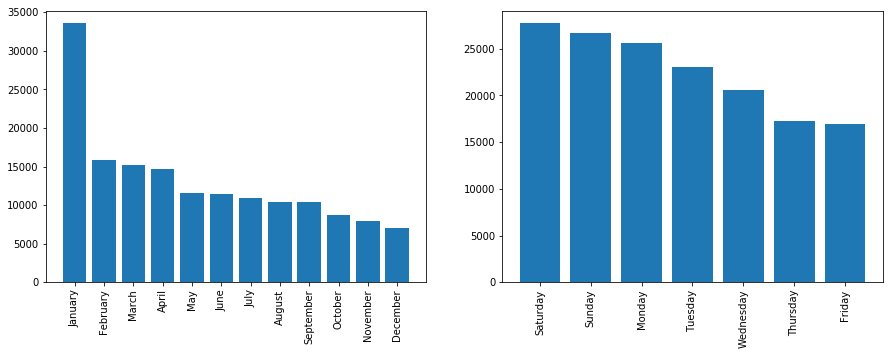

In [17]:
#Get some visual insights about NANs in the 'ArrDelay' feature for 1988 dataset
plt.figure(figsize = [15,5])

plt.subplot(1, 2, 1)
plt.bar(df_98[df_98.ArrDelay.isna() == True].Month.unique(), df_98[df_98.ArrDelay.isna() == True].Month.value_counts());
locs, labels = plt.xticks() 
plt.xticks(np.arange(12), df_98.Month.unique(), rotation=90);

plt.subplot(1, 2, 2)
plt.bar(df_98[df_98.ArrDelay.isna() == True].DayOfWeek.unique(), df_98[df_98.ArrDelay.isna() == True].DayOfWeek.value_counts());
locs, labels = plt.xticks() 
plt.xticks(np.arange(7), df_98.DayOfWeek.unique(), rotation=90);

plt.show()

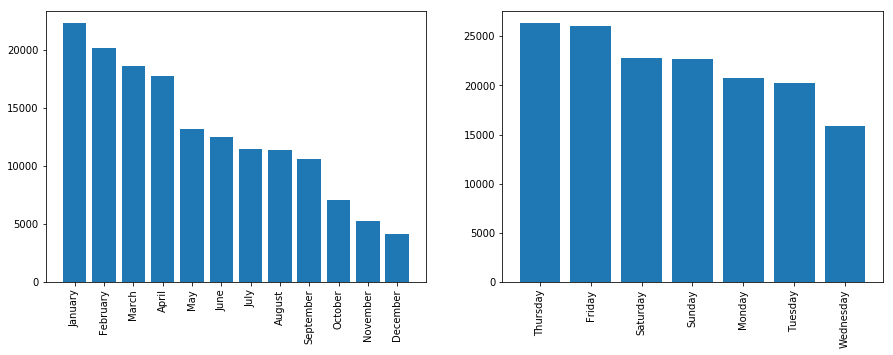

In [18]:
#Get some visual insights about NANs in the 'ArrDelay' feature for 1988 dataset
plt.figure(figsize = [15,5])

plt.subplot(1, 2, 1)
plt.bar(df_08[df_08.ArrDelay.isna() == True].Month.unique(), df_08[df_08.ArrDelay.isna() == True].Month.value_counts());
locs, labels = plt.xticks() 
plt.xticks(np.arange(12), df_08.Month.unique(), rotation=90);

plt.subplot(1, 2, 2)
plt.bar(df_08[df_08.ArrDelay.isna() == True].DayOfWeek.unique(), df_08[df_08.ArrDelay.isna() == True].DayOfWeek.value_counts());
locs, labels = plt.xticks() 
plt.xticks(np.arange(7), df_08.DayOfWeek.unique(), rotation=90);

plt.show()

## NAN Outcome

> Now that we have investigated some insights about how our NAN's are distributed we can drop them. The more we move to 2008, the more 'uniform the distribution, however we can say NAN's are allocated around January and the weekend - Mostly Saturday. We can now drrop them and come back to further work with them.

In [19]:
# drop rows with null values in the 'ArrDelay' field in all datasets
df_88.dropna(subset = ['ArrDelay'], inplace = True)
df_98.dropna(subset = ['ArrDelay'], inplace = True)
df_08.dropna(subset = ['ArrDelay'], inplace = True)
df_88.shape, df_98.shape, df_08.shape

((5137497, 10), (5227051, 10), (6855029, 10))

In [20]:
#Reassign df_88 to delayed-only flights and show the shape of delayed flights in 1988
df_88 = df_88[df_88.ArrDelay > 0]
df_88.shape

(2789190, 10)

In [21]:
#Reassign df_98 to delayed-only flights and show the shape of delayed flights in 1998
df_98 = df_98[df_98.ArrDelay > 0]
df_98.shape

(2512087, 10)

In [22]:
#Reassign df_08 to delayed-only flights and show the shape of delayed flights in 2008
df_08 = df_08[df_08.ArrDelay > 0]
df_08.shape

(2979504, 10)

In [23]:
#Check 1988 NAN values
df_88.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
ArrDelay                   0
CarrierDelay         2789190
WeatherDelay         2789190
NASDelay             2789190
SecurityDelay        2789190
LateAircraftDelay    2789190
dtype: int64

In [24]:
#Check 1998 NAN values
df_98.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
ArrDelay                   0
CarrierDelay         2512087
WeatherDelay         2512087
NASDelay             2512087
SecurityDelay        2512087
LateAircraftDelay    2512087
dtype: int64

In [25]:
#Check 2008 NAN values
df_08.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
ArrDelay                   0
CarrierDelay         1454769
WeatherDelay         1454769
NASDelay             1454769
SecurityDelay        1454769
LateAircraftDelay    1454769
dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

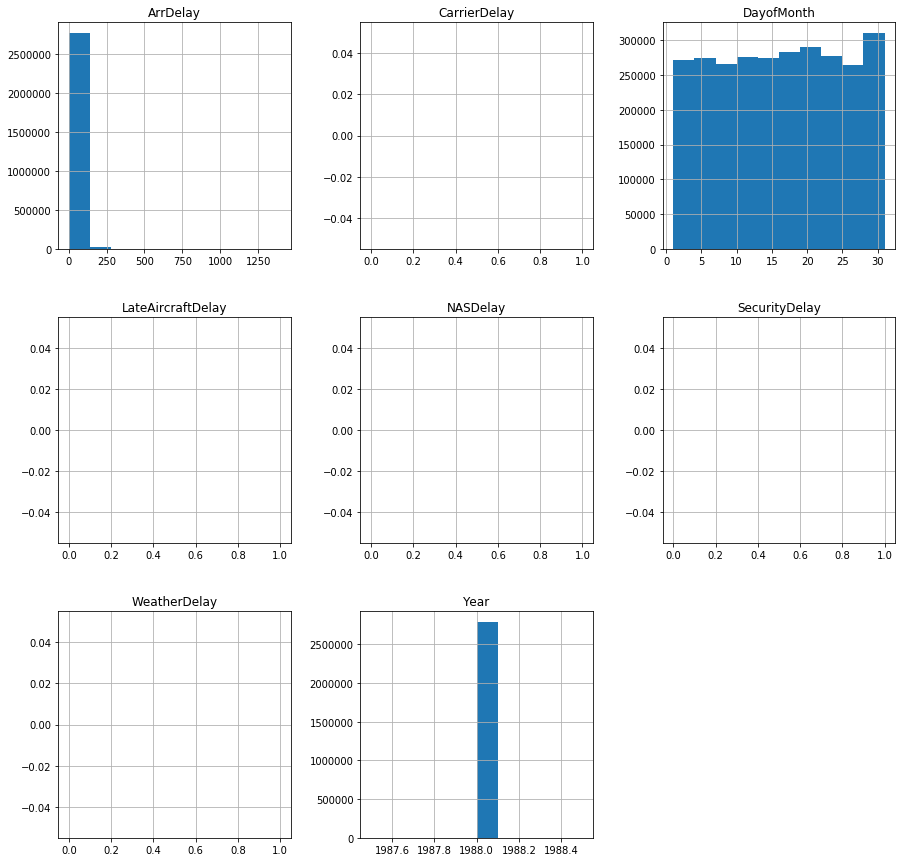

In [26]:
df_88.hist(figsize = [15,15]);

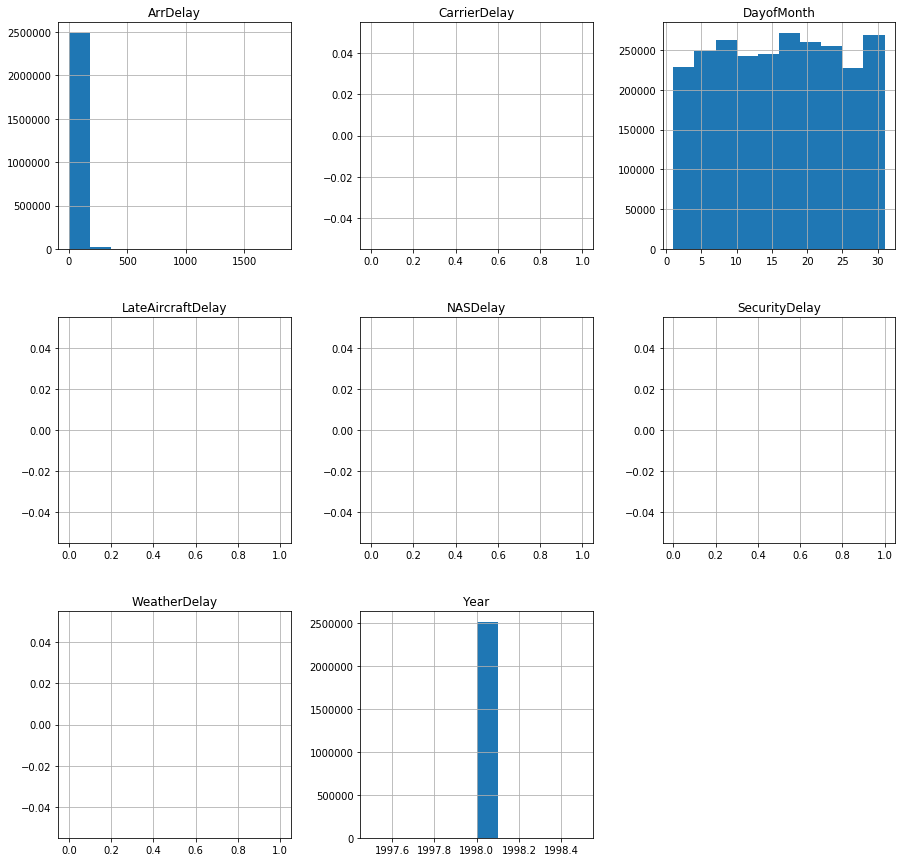

In [27]:
df_98.hist(figsize = [15,15]);

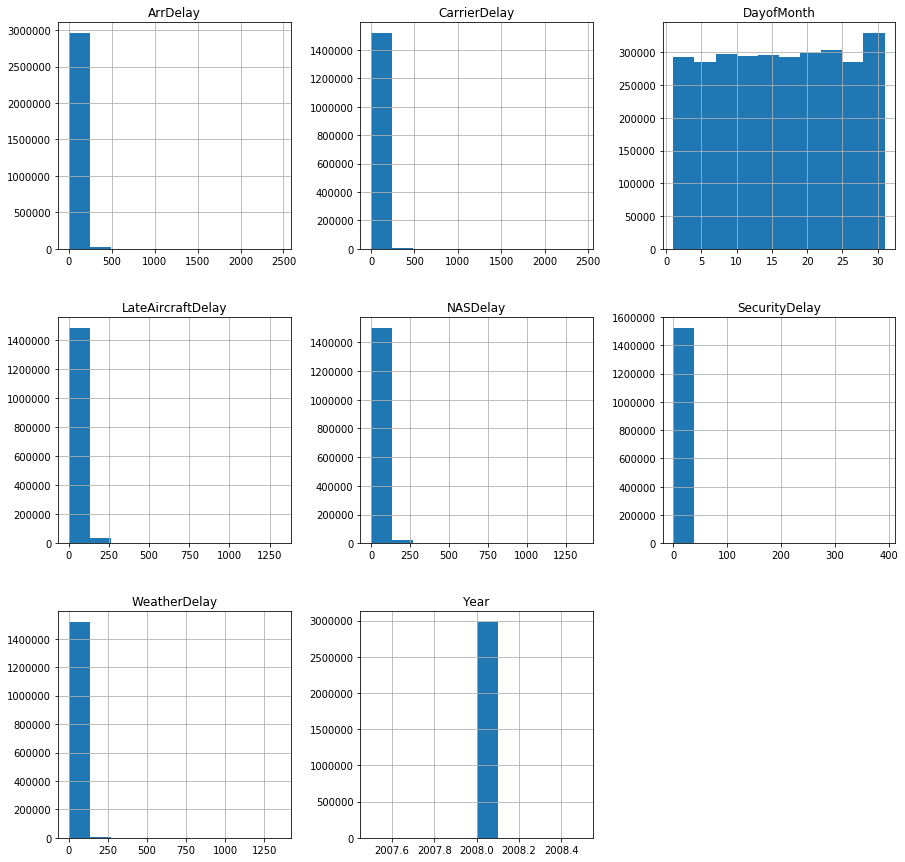

In [28]:
df_08.hist(figsize = [15,15]);

> From the Histograms above we can conclude that there is not a particular day in the month having delayed flights. We would get more insights if we parsed datetimes accordingly to see if certain delays are allocated in weekends or a specific month of the year like we have seen in the nulls. It is reasonable with high flight volumes, being unable to collect all data due to unplanned and emergency operations.

In [29]:
df_88.to_csv('88_delays.csv', index = False)
df_98.to_csv('98_delays.csv', index = False)
df_08.to_csv('08_delays.csv', index = False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!